# AMCAT - EDA

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('data.csv')

In [4]:
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [ ]:
## Exploratory Data Analysis

In [5]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [7]:
df.shape

(3998, 38)

# univariate Analysis : 
   Analysing the data using the single feature

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     3998 non-null   int64  
 1   Salary                 3998 non-null   float64
 2   DOJ                    3998 non-null   object 
 3   DOL                    3998 non-null   object 
 4   Designation            3998 non-null   object 
 5   JobCity                3998 non-null   object 
 6   Gender                 3998 non-null   object 
 7   DOB                    3998 non-null   object 
 8   10percentage           3998 non-null   float64
 9   10board                3998 non-null   object 
 10  12graduation           3998 non-null   int64  
 11  12percentage           3998 non-null   float64
 12  12board                3998 non-null   object 
 13  CollegeID              3998 non-null   int64  
 14  CollegeTier            3998 non-null   int64  
 15  Degr

In [9]:
df.describe()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


In [10]:
df.isna().sum()

ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
o

In [11]:
df.duplicated().sum()

0

In [12]:
pd.DataFrame(df['Salary'].describe())

,Salary
count,3.998000e+03
mean,3.076998e+05
std,2.127375e+05
min,3.500000e+04
25%,1.800000e+05
50%,3.000000e+05
75%,3.700000e+05
max,4.000000e+06


Text(0.5, 1.0, 'Distribution of salary')

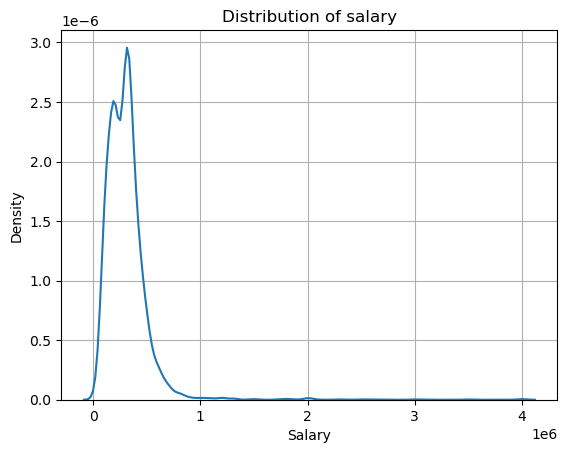

In [13]:
sns.kdeplot(data=df['Salary'])
plt.grid()
plt.title('Distribution of salary')

In [39]:
# Step 1: Create a DataFrame with the counts of specializations
specialization_counts = df['Specialization'].value_counts().head(10).reset_index()
specialization_counts.columns = ['Specialization', 'Count']  # Rename columns


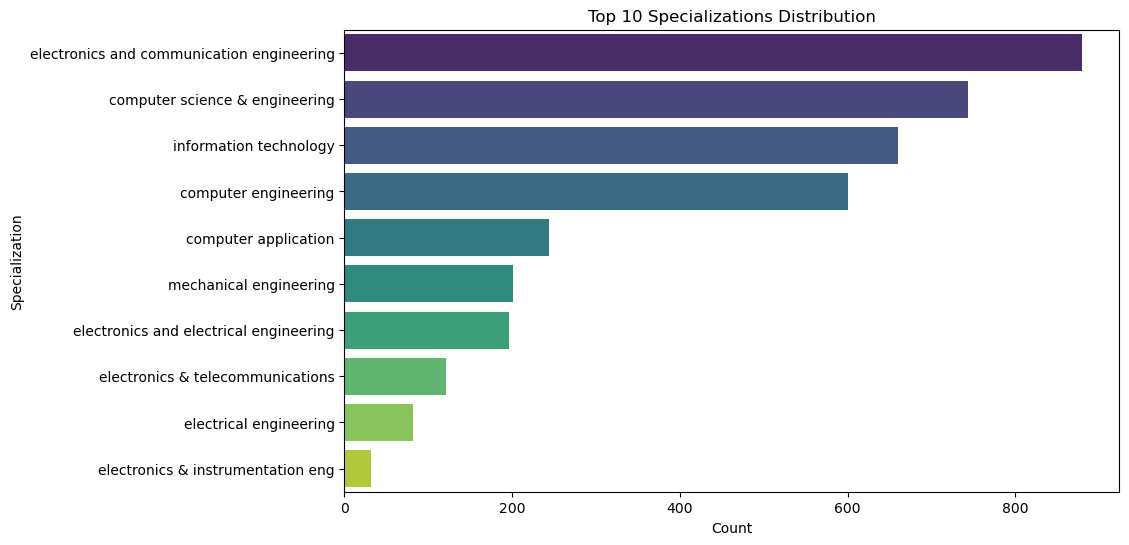

In [40]:
# Step 2: Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(y='Specialization', x='Count', data=specialization_counts, palette='viridis')
plt.title('Top 10 Specializations Distribution')
plt.xlabel('Count')
plt.ylabel('Specialization')
plt.show()


# Observation
 * There are more electonics engineers compared to others 
 * There are less electrical & instrumenatation egineer

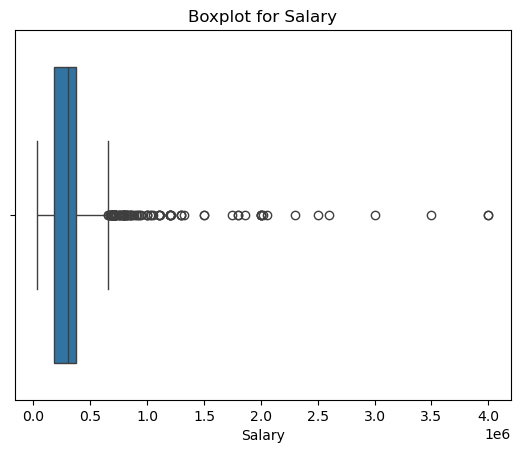

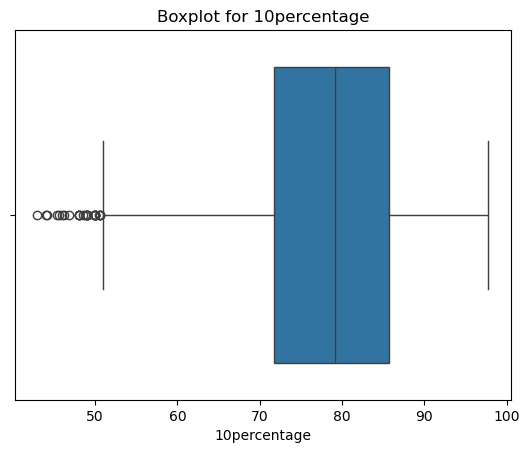

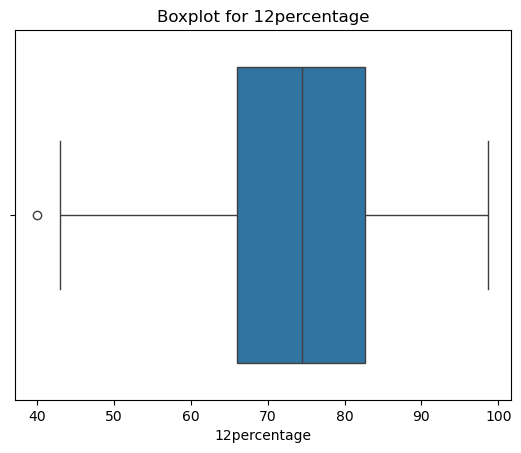

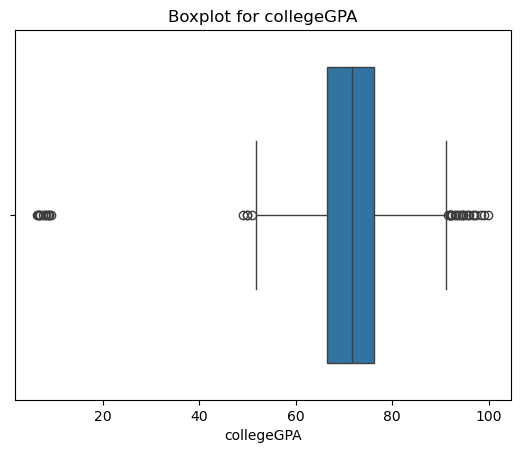

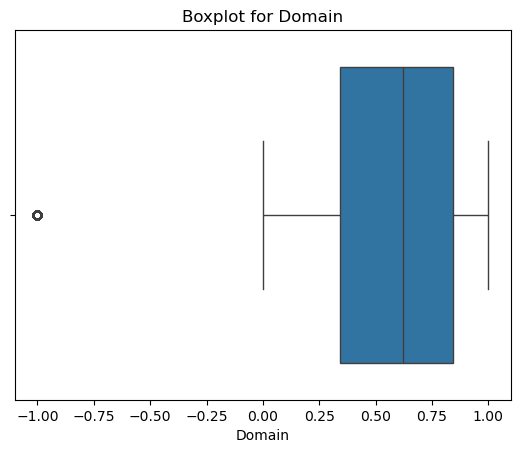

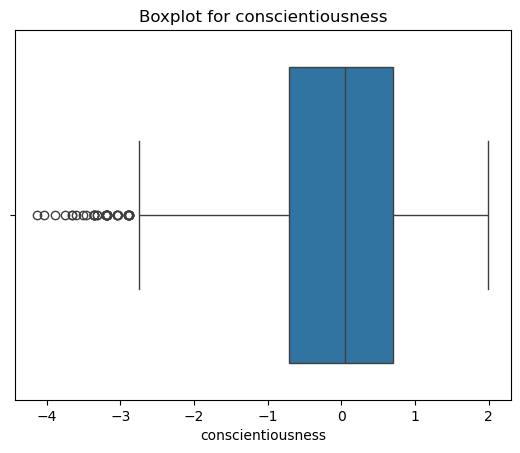

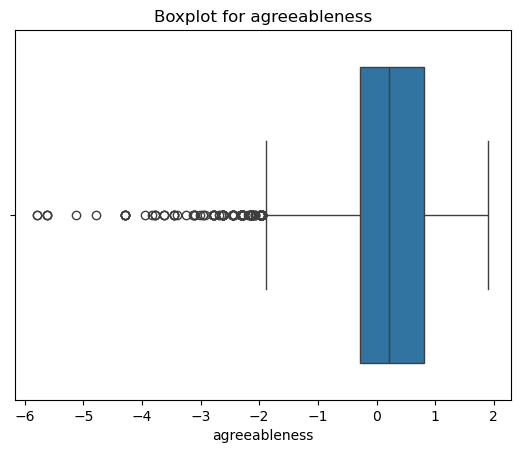

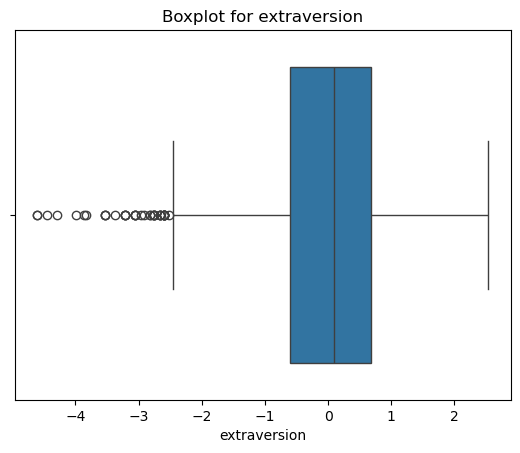

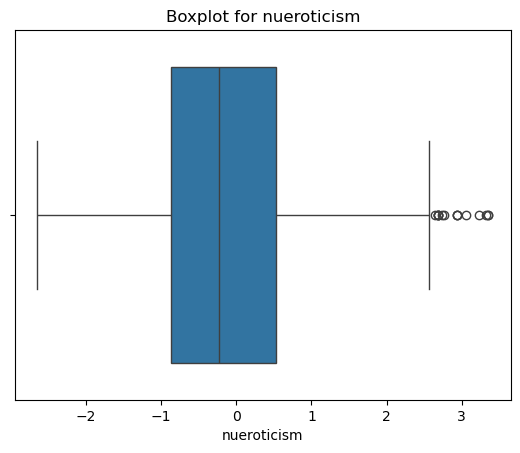

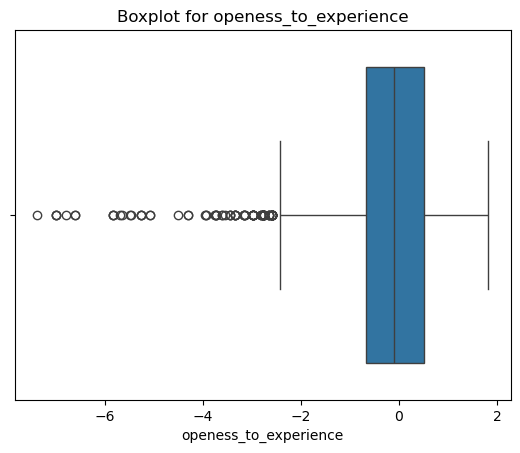

In [43]:
for i in df.columns:
    if df[i].dtype=='int' or df[i].dtype=='float':
        sns.boxplot(x=df[i])
        plt.title('Boxplot for {}'.format(i))
        plt.show()

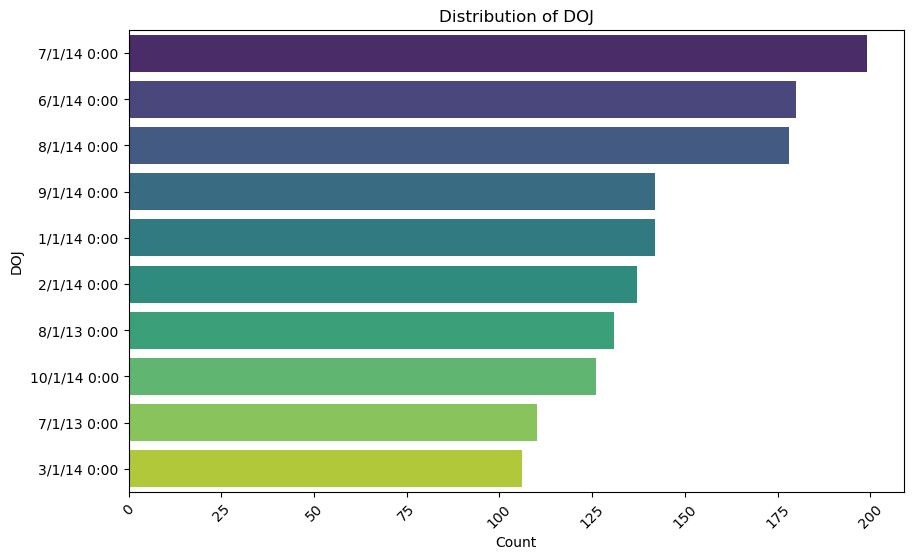

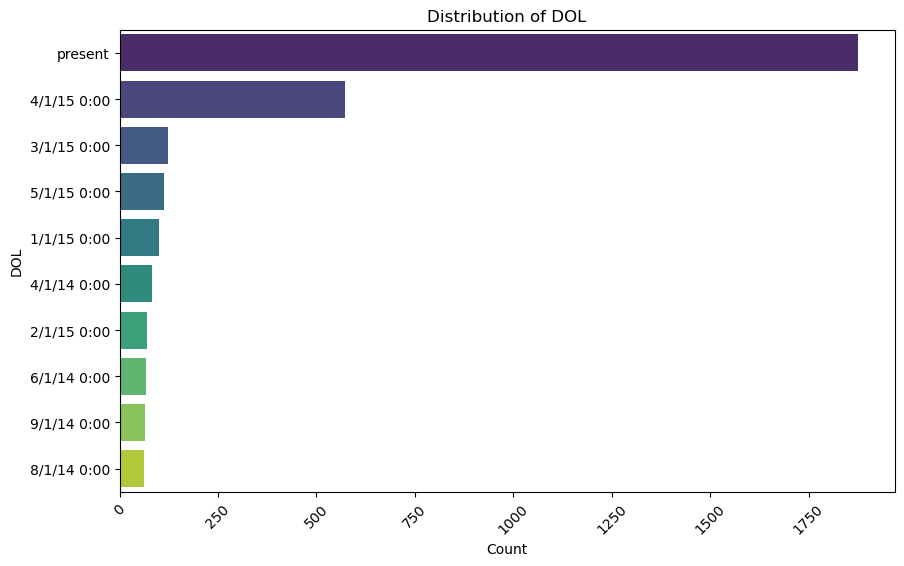

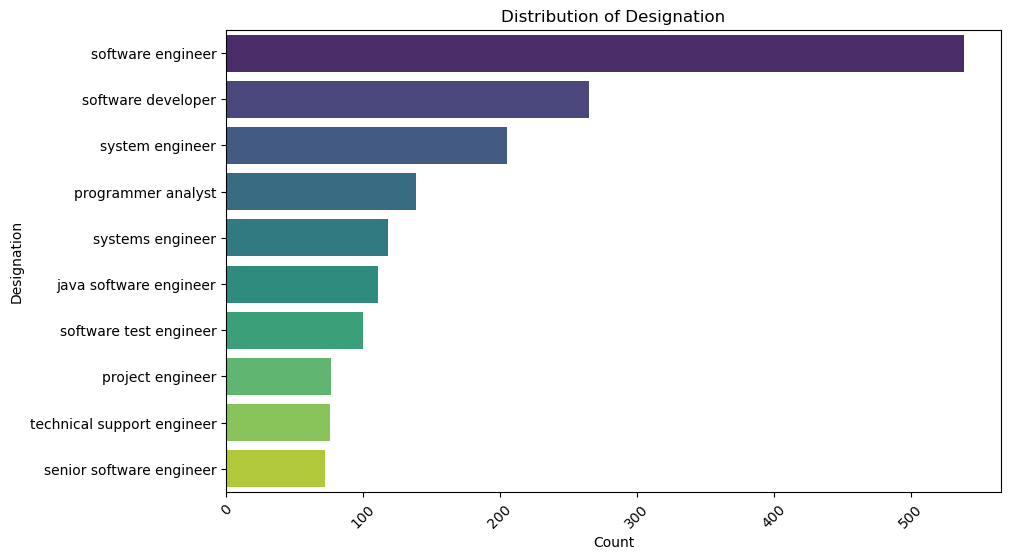

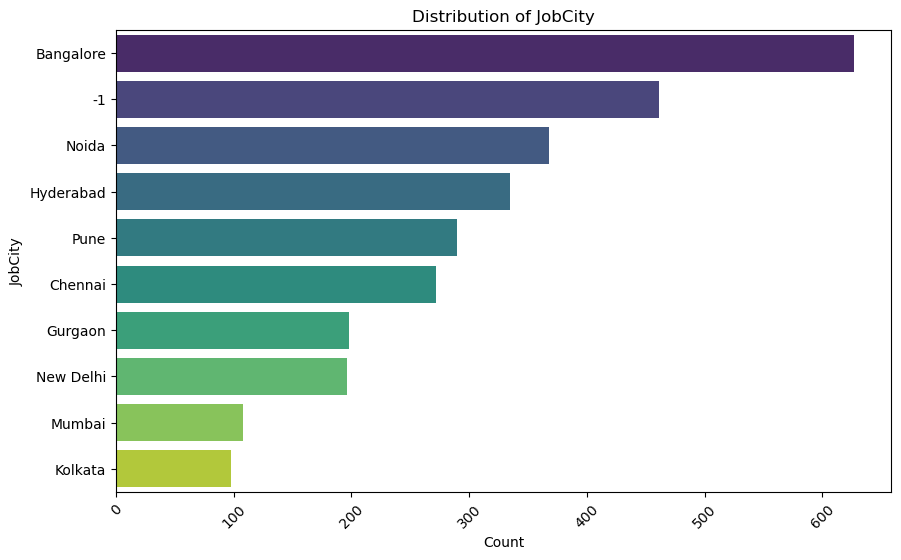

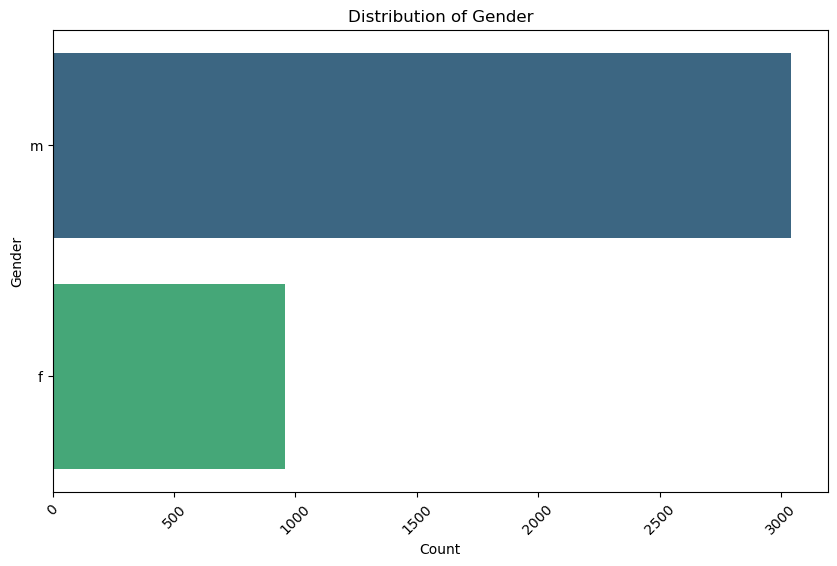

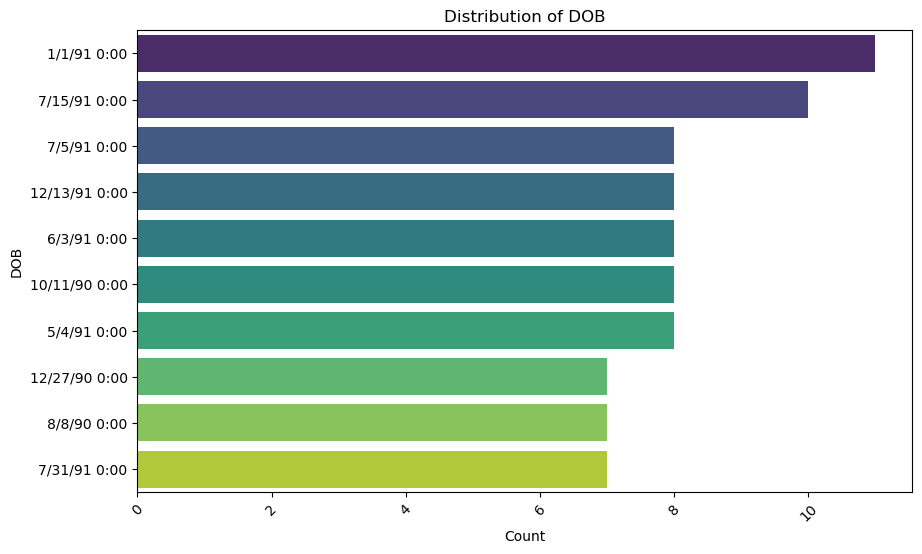

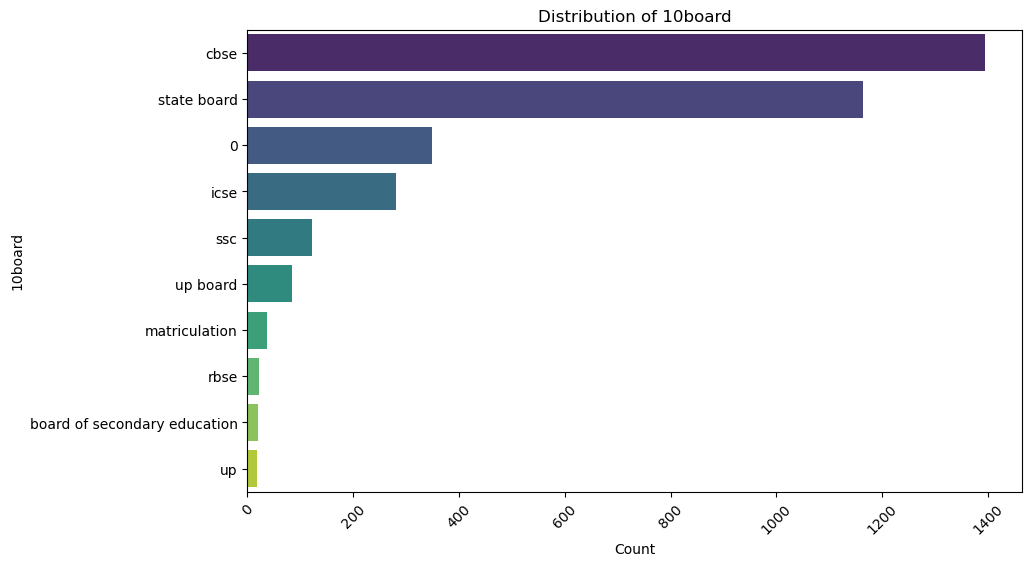

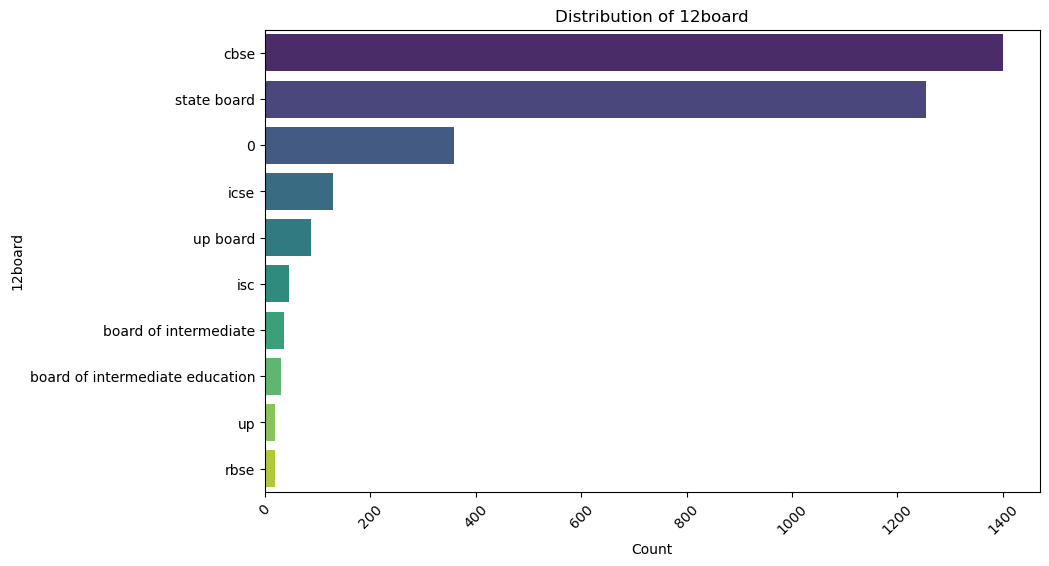

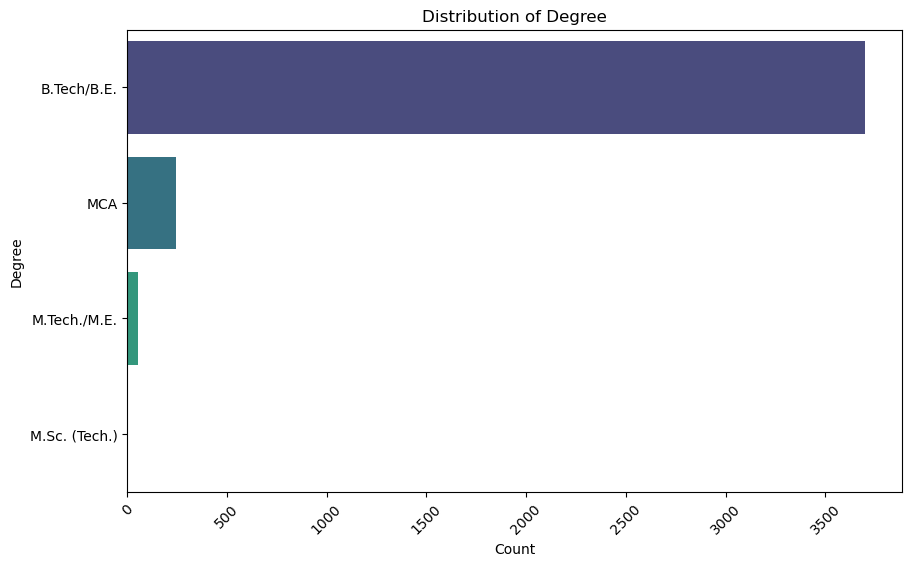

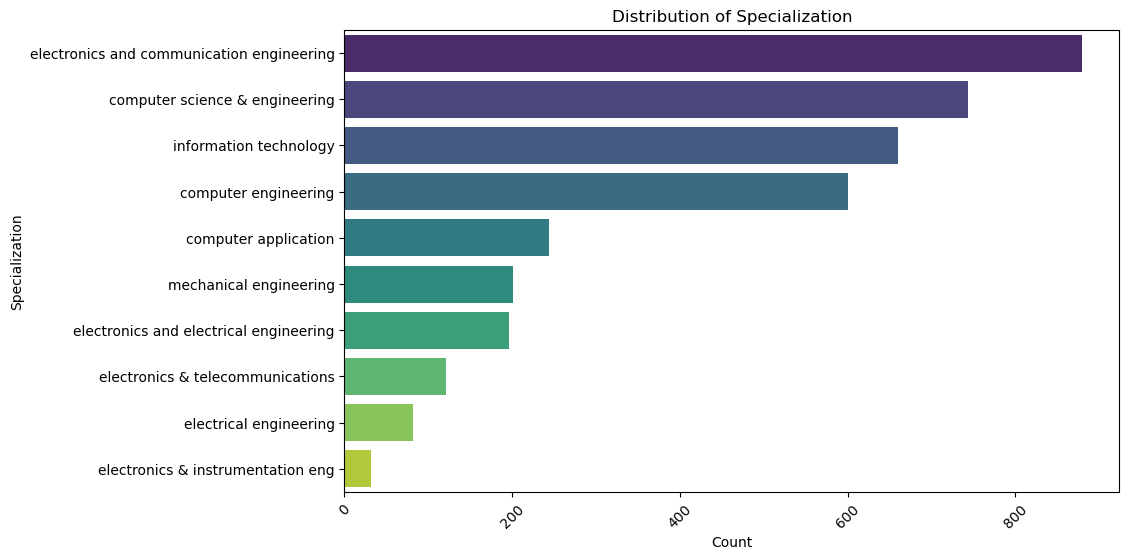

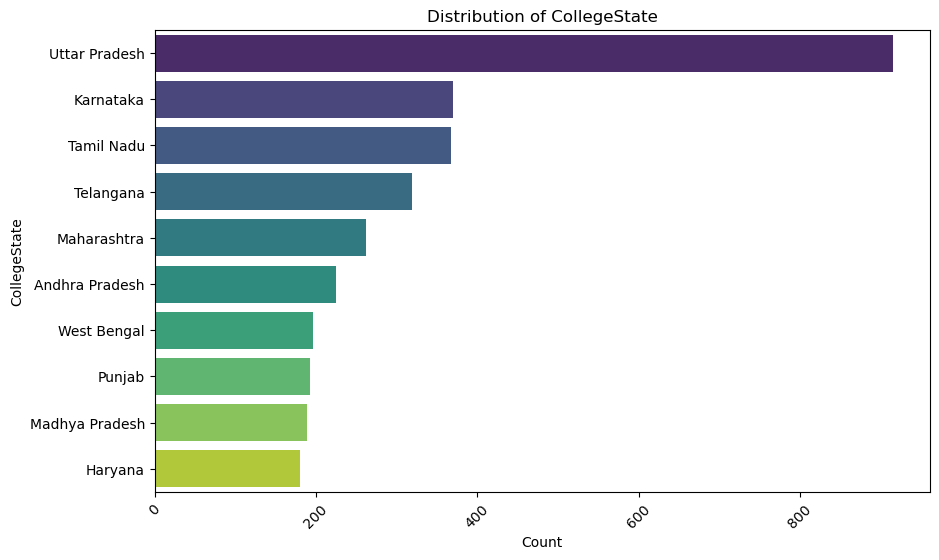

In [45]:
for col in df.columns:
    if df[col].dtype == 'object':  
        counts = df[col].value_counts().head(10).reset_index()
        counts.columns = [col, 'Count']  # Rename columns for clarity

        # Create a bar plot for the top 10 categories
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Count', y=col, data=counts, palette='viridis')
        plt.title(f'Distribution of {col}')
        plt.xlabel('Count')
        plt.ylabel(col)
        plt.xticks(rotation=45)  


# Bivariate Analysis:
  Analysing the data using the two features 

In [49]:
g1=df.groupby('Specialization')[['collegeGPA']].mean().sort_values(by="collegeGPA" , ascending=False)


In [50]:
g1

,collegeGPA
Specialization,
embedded systems technology,88.000000
control and instrumentation engineering,82.100000
information science,81.200000
internal combustion engine,80.600000
industrial & management engineering,80.000000
computer science,77.385000
computer and communication engineering,77.260000
power systems and automation,76.000000
other,75.619231


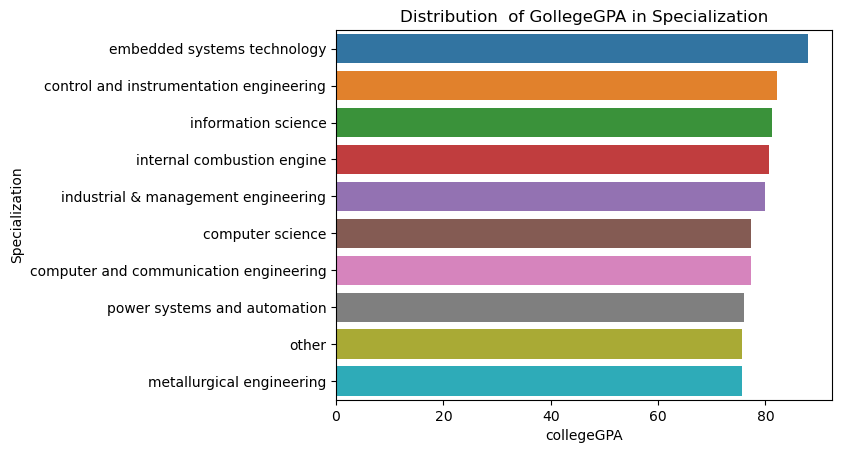

In [54]:
sns.barplot(y=g1.index[:10],x=g1["collegeGPA"][:10] , hue=g1.index[:10])
plt.title("Distribution  of GollegeGPA in Specialization")
plt.show()

# Observation
* The Average GPA of embedded systems technology is more compared to others and 
 less GPA for metallurigcal engineering 

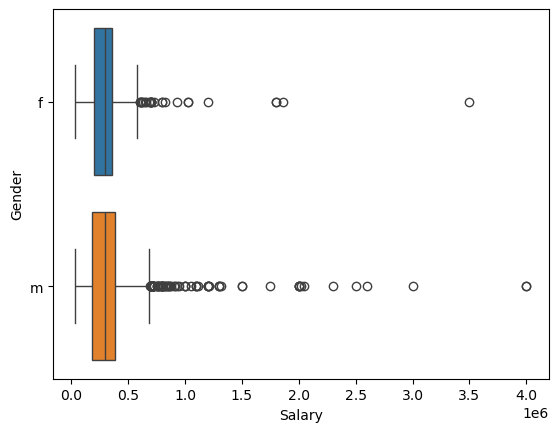

In [56]:
sns.boxplot(y=df['Gender'], x=df['Salary'], hue=df['Gender'])
plt.show()

In [57]:
g2=df.groupby('Designation')[['Salary']].mean()
g2

,Salary
Designation,
.net developer,223382.352941
.net web developer,196250.000000
account executive,287500.000000
account manager,350000.000000
admin assistant,102500.000000
...,...
web designer and seo,200000.000000
web developer,168981.481481
web intern,205000.000000


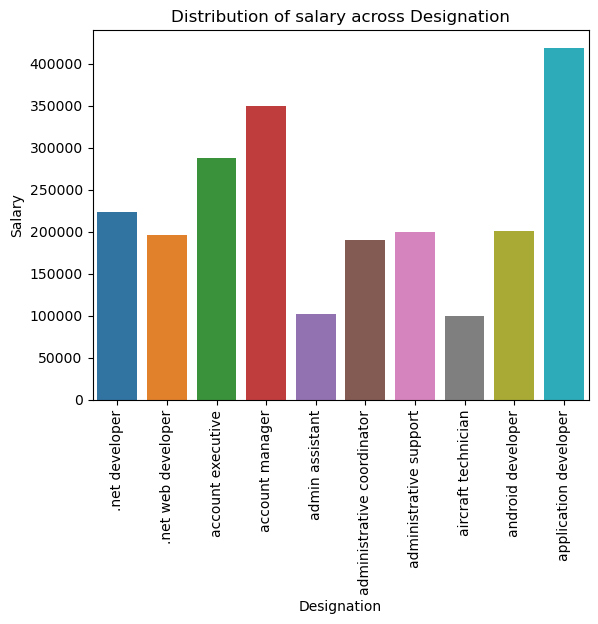

In [59]:
sns.barplot(x=g2.index[:10], y=g2['Salary'][:10], hue=g2.index[:10])
plt.xticks(rotation=90)
plt.title("Distribution of salary across Designation")
plt.show()

# observation
* The Average salary of application developer is more compared to othet designations 
* There are less salaries for admin assistant and aircraft technician

# Research Questions

Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you.


In [64]:
relevant_roles=['programmer Analyst', 'software engineer', 'hardware engineer', 'associate engineer']
filtered_df=df[df['Designation'].isin(relevant_roles)]
salary_data=filtered_df['Salary']
claimed_mean_salary=2.75*100000

t_stat, p_value=stats.ttest_1samp(salary_data , claimed_mean_salary)
print(f"Mean Salary of selected Roles :{salary_data.mean():2f}")
print(f"Claimed Mean Salary  :{claimed_mean_salary:2f}")
print(f"T-statistic  :{t_stat:2f}")
print(f"P-value:{p_value:4f}")

alpha=0.05
if p_value<alpha:
    print("Reject the null hypothesis:The average salary is significantly different from the claimed mean.")

Mean Salary of selected Roles :339792.043400
Claimed Mean Salary  :275000.000000
T-statistic  :10.551638
P-value:0.000000
Reject the null hypothesis:The average salary is significantly different from the claimed mean.


## Question : Is there a relationship between gender and specialization? (i.e. Does the preference of Specialisation depend on the Gender?)

In [65]:
from scipy import stats as st

cont_table=pd.crosstab(index=df['Specialization'], columns=df["Gender"])
chi2_stat, p_value,dof, exp_freq=st.chi2_contingency(cont_table)
alpha=0.05

if p_value <alpha:
    print("Reject the null hypothesis:There is a significant difference between the gender and Specialization")
else:
    print("Fail to reject the null hypothesis:There is no significant difference between the gender and Specialization")

Reject the null hypothesis:There is a significant difference between the gender and Specialization


# Conclusion

Overall, Analysis indicates significant findings regarding salary distributions across designations, the relationship between specialization and gender, and the evaluation of claimed salary figures against actual data.

**Specialization Preference:**
The analysis confirms the potential influence of gender on specialization choices, suggesting that targeted interventions may be needed to promote gender diversity in certain fields.

**Salary Insights:**
The findings also reveal a disparity between the claimed and actual salaries for specific engineering roles, highlighting the necessity for prospective students and graduates to consider realistic salary expectations when entering the job market.